In [1]:
import pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:
df = pandas.read_csv('seattle-weather.csv')
df = df.iloc[:,1:5]

print(df)

      precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
1              10.9      10.6       2.8   4.5
2               0.8      11.7       7.2   2.3
3              20.3      12.2       5.6   4.7
4               1.3       8.9       2.8   6.1
...             ...       ...       ...   ...
1456            8.6       4.4       1.7   2.9
1457            1.5       5.0       1.7   1.3
1458            0.0       7.2       0.6   2.6
1459            0.0       5.6      -1.0   3.4
1460            0.0       5.6      -2.1   3.5

[1461 rows x 4 columns]


1. Normalisasikan dataset seattle-weather menggunakan normalisasi minmax

In [18]:
precipitation_max,precipitation_min = df['precipitation'].max(), df['precipitation'].min()
tempMax_max, tempMax_min = df['temp_max'].max(), df['temp_max'].min()
tempMin_max, tempMin_min = df['temp_min'].max(), df['temp_min'].min()
wind_max, wind_min = df['wind'].max(), df['wind'].min()

for i in df.index :
  df.loc[i, 'precipitation'] = (df.loc[i, 'precipitation']-precipitation_min)/(precipitation_max-precipitation_min)
  df.loc[i, 'temp_max'] = (df.loc[i, 'temp_max']-tempMax_min)/(tempMax_max-tempMax_min)
  df.loc[i, 'temp_min'] = (df.loc[i, 'temp_min']-tempMin_min)/(tempMin_max-tempMin_min)
  df.loc[i, 'wind'] = (df.loc[i, 'wind']-wind_min)/(wind_max-wind_min)

print(df)

      precipitation  temp_max  temp_min      wind
0          0.000000  0.387097  0.476378  0.472527
1          0.194991  0.327957  0.389764  0.450549
2          0.014311  0.357527  0.562992  0.208791
3          0.363148  0.370968  0.500000  0.472527
4          0.023256  0.282258  0.389764  0.626374
...             ...       ...       ...       ...
1456       0.153846  0.161290  0.346457  0.274725
1457       0.026834  0.177419  0.346457  0.098901
1458       0.000000  0.236559  0.303150  0.241758
1459       0.000000  0.193548  0.240157  0.329670
1460       0.000000  0.193548  0.196850  0.340659

[1461 rows x 4 columns]


2. Tampilkan scatter plot sebelum clustering

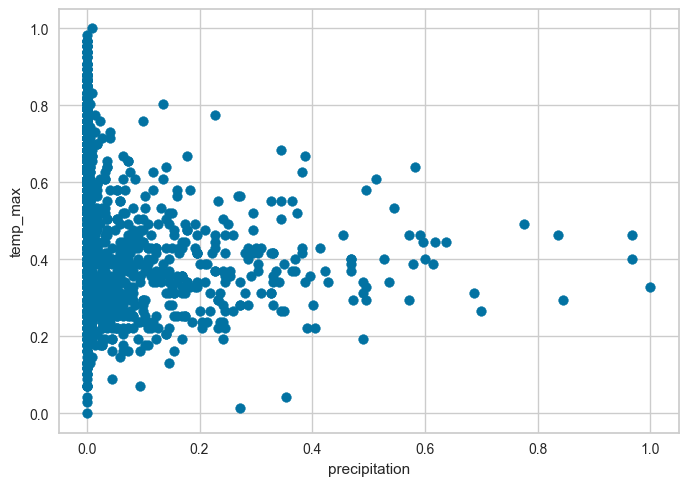

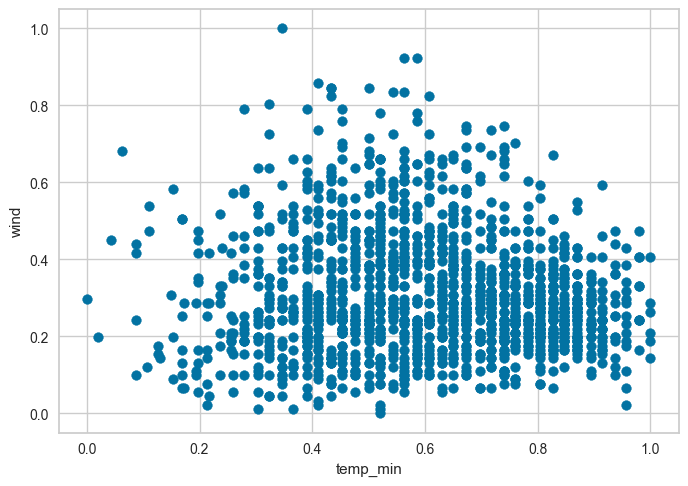

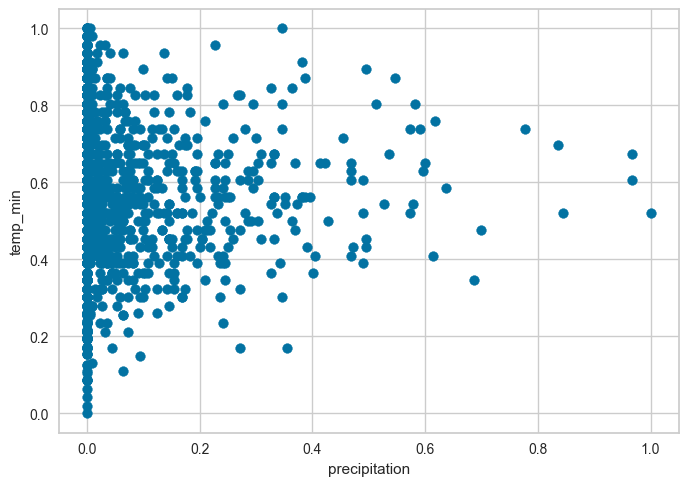

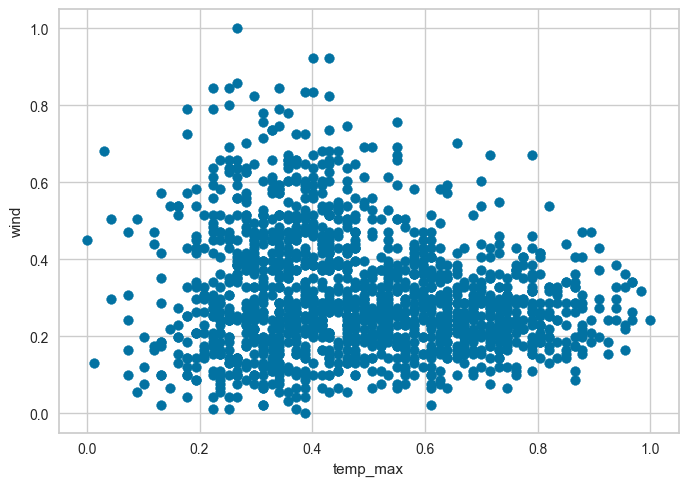

In [4]:
# precipitation - temp_max
plt.scatter(df['precipitation'],df['temp_max']) 
plt.xlabel('precipitation')
plt.ylabel('temp_max')
plt.show()

# temp_min - wind
plt.scatter(df['temp_min'],df['wind']) 
plt.xlabel('temp_min')
plt.ylabel('wind')
plt.show()

# precipitation ~ temp_min
plt.scatter(df['precipitation'],df['temp_min']) 
plt.xlabel('precipitation')
plt.ylabel('temp_min')
plt.show()
plt.show()

# temp_max ~ wind
plt.scatter(df['temp_max'],df['wind']) 
plt.xlabel('temp_max')
plt.ylabel('wind')
plt.show()


3. Clusterlah dataset seattle-weather dengan nilai K 2, 3, 4

In [5]:
# precipitation - temp_max (cluster = 2)
km_premax2 = KMeans(n_clusters=2)
df_premax2 = df.copy()
y_predicted = km_premax2.fit_predict(df_premax2[['precipitation','temp_max']])
df_premax2['cluster'] = y_predicted
print(y_predicted)
km_premax2.cluster_centers_

# precipitation - temp_max (cluster = 3)
km_premax3 = KMeans(n_clusters=3)
df_premax3 = df.copy()
y_predicted = km_premax3.fit_predict(df_premax3[['precipitation','temp_max']])
df_premax3['cluster'] = y_predicted
print(y_predicted)

# precipitation - temp_max (cluster = 4)
km_premax4 = KMeans(n_clusters=4)
df_premax4 = df.copy()
y_predicted = km_premax4.fit_predict(df_premax4[['precipitation','temp_max']])
df_premax4['cluster'] = y_predicted
print(y_predicted)

[0 0 0 ... 0 0 0]
[0 2 0 ... 2 2 2]
[3 0 0 ... 0 0 0]


In [17]:
# temp_min - wind (cluster = 2)
km_minwind2 = KMeans(n_clusters=2)
df_minwind2 = df.copy()
y_predicted = km_minwind2.fit_predict(df_minwind2[['temp_min','wind']])
df_minwind2['cluster'] = y_predicted
print(y_predicted)

# temp_min - wind (cluster = 3)
km_minwind3 = KMeans(n_clusters=3)
df_minwind3 = df.copy()
y_predicted = km_minwind3.fit_predict(df_minwind3[['temp_min','wind']])
df_minwind3['cluster'] = y_predicted
print(y_predicted)

# temp_min - wind (cluster = 4)
km_minwind4 = KMeans(n_clusters=4)
df_minwind4 = df.copy()
y_predicted = km_minwind4.fit_predict(df_minwind4[['temp_min','wind']])
df_minwind4['cluster'] = y_predicted
print(y_predicted)

[1 1 1 ... 1 1 1]
[0 0 2 ... 2 2 2]
True
[0 0 3 ... 2 2 2]


In [7]:
# precipitation ~ temp_min (cluster = 2)
km_premin2 = KMeans(n_clusters=2)
df_premin2 = df.copy()
y_predicted = km_premin2.fit_predict(df_premin2[['precipitation','temp_min']])
df_premin2['cluster'] = y_predicted
print(y_predicted)

# precipitation ~ temp_min (cluster = 3)
km_premin3 = KMeans(n_clusters=3)
df_premin3 = df.copy()
y_predicted = km_premin3.fit_predict(df_premin3[['precipitation','temp_min']])
df_premin3['cluster'] = y_predicted
print(y_predicted)

# precipitation ~ temp_min (cluster = 4)
km_premin4 = KMeans(n_clusters=4)
df_premin4 = df.copy()
y_predicted = km_premin4.fit_predict(df_premin4[['precipitation','temp_min']])
df_premin4['cluster'] = y_predicted
print(y_predicted)

[1 1 1 ... 1 1 1]
[0 0 1 ... 0 0 0]
[1 3 1 ... 3 3 3]


In [8]:
# temp_max ~ wind (cluster = 2)
km_maxwind2 = KMeans(n_clusters=2)
df_maxwind2 = df.copy()
y_predicted = km_maxwind2.fit_predict(df_maxwind2[['temp_max','wind']])
df_maxwind2['cluster'] = y_predicted
print(y_predicted)

# temp_max ~ wind (cluster = 3)
km_maxwind3 = KMeans(n_clusters=3)
df_maxwind3 = df.copy()
y_predicted = km_maxwind3.fit_predict(df_maxwind3[['temp_max','wind']])
df_maxwind3['cluster'] = y_predicted
print(y_predicted)

# temp_max ~ wind (cluster = 4)
km_maxwind4 = KMeans(n_clusters=4)
df_maxwind4 = df.copy()
y_predicted = km_maxwind4.fit_predict(df_maxwind4[['temp_max','wind']])
df_maxwind4['cluster'] = y_predicted
print(y_predicted)

[1 1 1 ... 1 1 1]
[2 2 1 ... 1 1 1]
[1 1 3 ... 3 3 3]


4. Tentukan K terbaik jika dilakukan dengan analisis Elbow Method

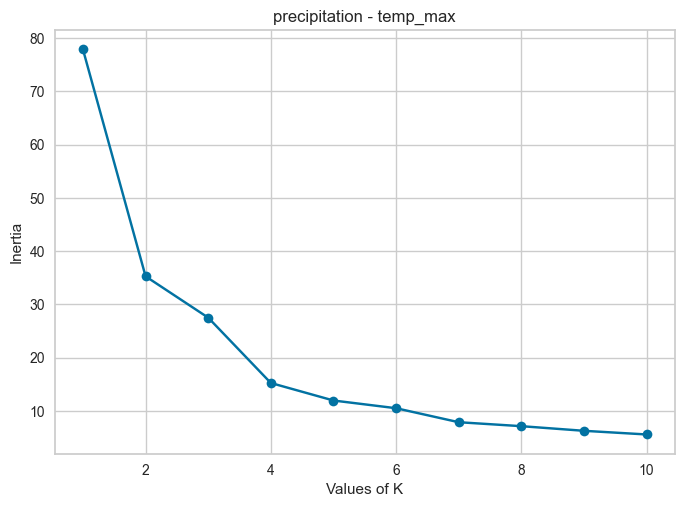

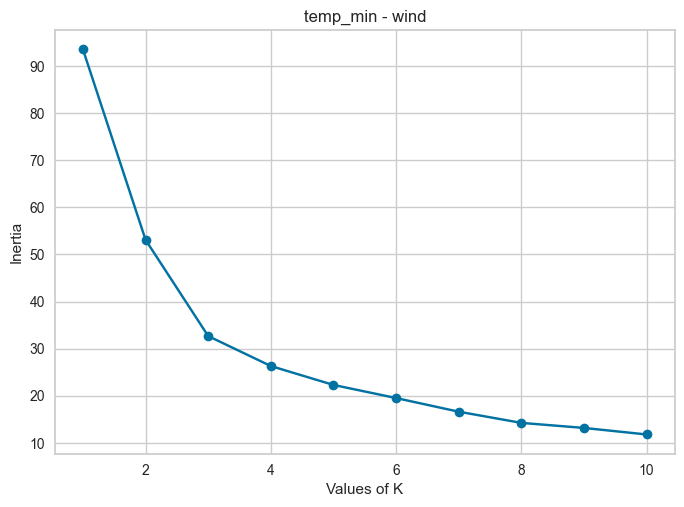

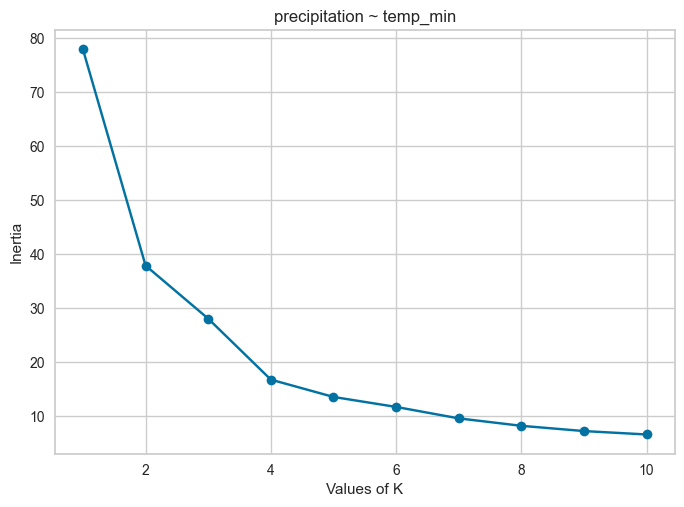

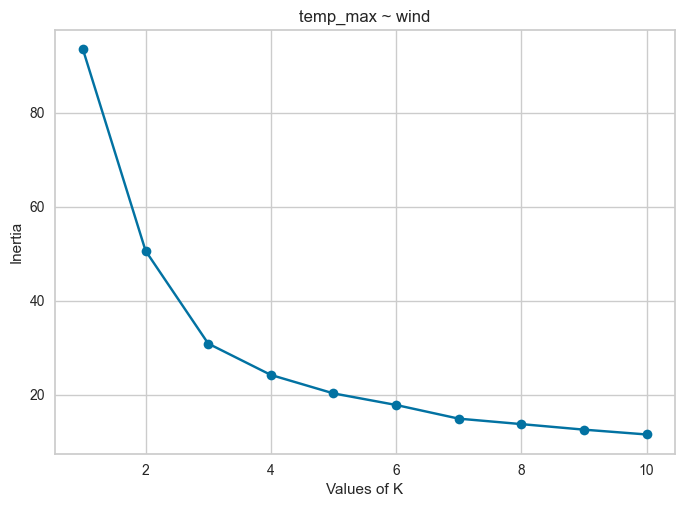

In [19]:
# precipitation - temp_max
inertia = []
X = df[['precipitation','temp_max']]
K = range(1, 11)
for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    inertia.append(clustering.inertia_)
plt.plot(K, inertia, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('precipitation - temp_max')
plt.show()

# temp_min - wind
inertia = []
X = df[['temp_min','wind']]
K = range(1, 11)
for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    inertia.append(clustering.inertia_)
plt.plot(K, inertia, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('temp_min - wind')
plt.show()

# precipitation ~ temp_min
inertia = []
X = df[['precipitation','temp_min']]
K = range(1, 11)
for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    inertia.append(clustering.inertia_)
plt.plot(K, inertia, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('precipitation ~ temp_min')
plt.show()

# temp_max ~ wind
inertia = []
X = df[['temp_max','wind']]
K = range(1, 11)
for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    inertia.append(clustering.inertia_)
plt.plot(K, inertia, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('temp_max ~ wind')
plt.show()

5. Tampilkan scatter plot setelah clustering


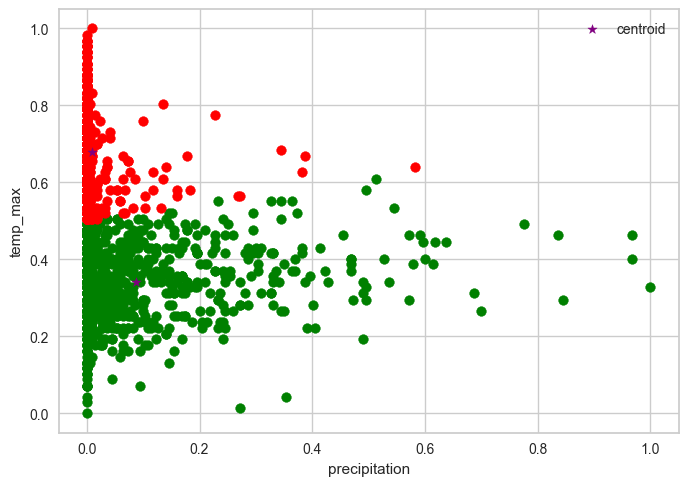

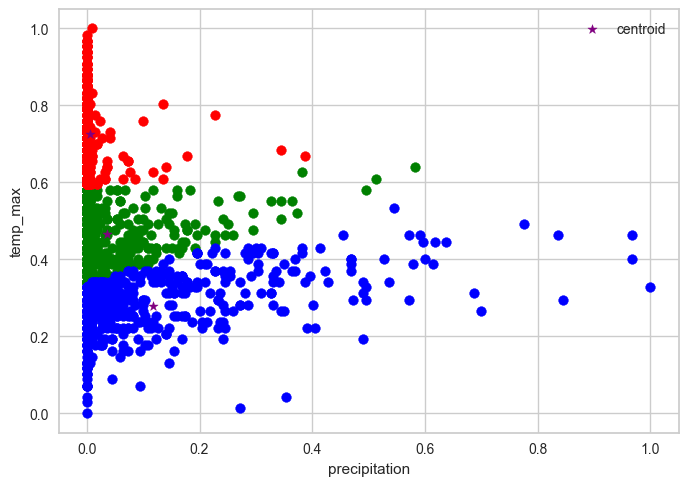

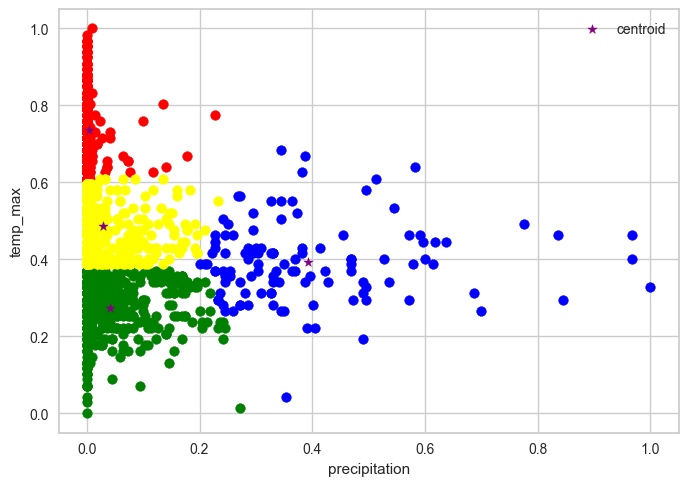

In [10]:
# precipitation - temp_max (cluster = 2)
km_premax2.cluster_centers_
cluster1 = df_premax2[df_premax2.cluster==0]
cluster2 = df_premax2[df_premax2.cluster==1]
plt.scatter(cluster1['precipitation'],cluster1['temp_max'],color='green')
plt.scatter(cluster2['precipitation'],cluster2['temp_max'],color='red')
plt.scatter(km_premax2.cluster_centers_[:,0], km_premax2.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('precipitation')
plt.ylabel('temp_max')
plt.legend()
plt.show()

# precipitation - temp_max (cluster = 3)
km_premax3.cluster_centers_
cluster1 = df_premax3[df_premax3.cluster==0]
cluster2 = df_premax3[df_premax3.cluster==1] 
cluster3 = df_premax3[df_premax3.cluster==2] 
plt.scatter(cluster1['precipitation'],cluster1['temp_max'],color='green')
plt.scatter(cluster2['precipitation'],cluster2['temp_max'],color='red')
plt.scatter(cluster3['precipitation'],cluster3['temp_max'],color='blue')
plt.scatter(km_premax3.cluster_centers_[:,0], km_premax3.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('precipitation')
plt.ylabel('temp_max')
plt.legend()
plt.show()

# precipitation - temp_max (cluster = 4)
km_premax4.cluster_centers_   
cluster1 = df_premax4[df_premax4.cluster==0]
cluster2 = df_premax4[df_premax4.cluster==1]
cluster3 = df_premax4[df_premax4.cluster==2]
cluster4 = df_premax4[df_premax4.cluster==3]
plt.scatter(cluster1['precipitation'],cluster1['temp_max'],color='green')
plt.scatter(cluster2['precipitation'],cluster2['temp_max'],color='red')
plt.scatter(cluster3['precipitation'],cluster3['temp_max'],color='blue')
plt.scatter(cluster4['precipitation'],cluster4['temp_max'],color='yellow')
plt.scatter(km_premax4.cluster_centers_[:,0], km_premax4.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('precipitation')
plt.ylabel('temp_max')
plt.legend()
plt.show()

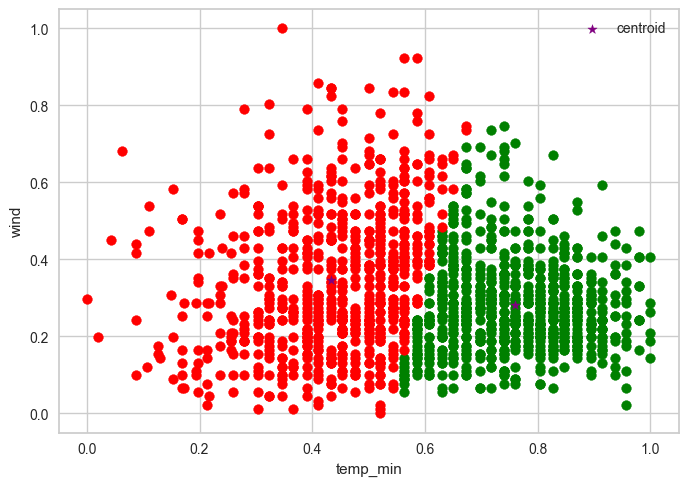

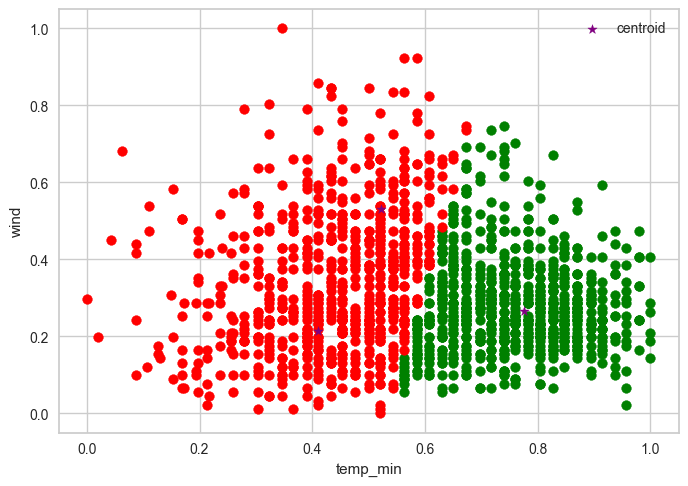

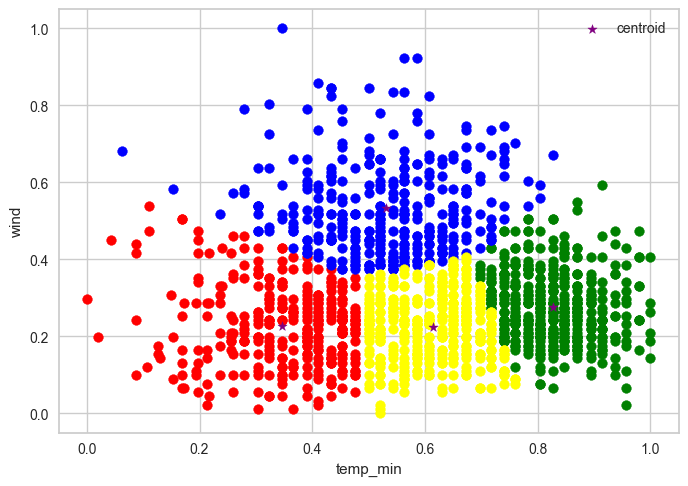

In [11]:
# temp_min - wind (cluster = 2)
km_minwind2.cluster_centers_
cluster1 = df_minwind2[df_minwind2.cluster==0]
cluster2 = df_minwind2[df_minwind2.cluster==1]
plt.scatter(cluster1['temp_min'],cluster1['wind'],color='green')
plt.scatter(cluster2['temp_min'],cluster2['wind'],color='red')
plt.scatter(km_minwind2.cluster_centers_[:,0], km_minwind2.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('temp_min')
plt.ylabel('wind')
plt.legend()
plt.show()

# temp_min - wind (cluster = 3)
km_minwind3.cluster_centers_
cluster1 = df_minwind2[df_minwind2.cluster==0]
cluster2 = df_minwind2[df_minwind2.cluster==1] 
cluster3 = df_minwind2[df_minwind2.cluster==2] 
plt.scatter(cluster1['temp_min'],cluster1['wind'],color='green')
plt.scatter(cluster2['temp_min'],cluster2['wind'],color='red')
plt.scatter(cluster3['temp_min'],cluster3['wind'],color='blue')
plt.scatter(km_minwind3.cluster_centers_[:,0], km_minwind3.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('temp_min')
plt.ylabel('wind')
plt.legend()
plt.show()

# temp_min - wind (cluster = 4)
km_minwind4.cluster_centers_
cluster1 = df_minwind4[df_minwind4.cluster==0]
cluster2 = df_minwind4[df_minwind4.cluster==1]
cluster3 = df_minwind4[df_minwind4.cluster==2]
cluster4 = df_minwind4[df_minwind4.cluster==3]
plt.scatter(cluster1['temp_min'],cluster1['wind'],color='green')
plt.scatter(cluster2['temp_min'],cluster2['wind'],color='red')
plt.scatter(cluster3['temp_min'],cluster3['wind'],color='blue')
plt.scatter(cluster4['temp_min'],cluster4['wind'],color='yellow')
plt.scatter(km_minwind4.cluster_centers_[:,0], km_minwind4.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('temp_min')
plt.ylabel('wind')
plt.legend()
plt.show()

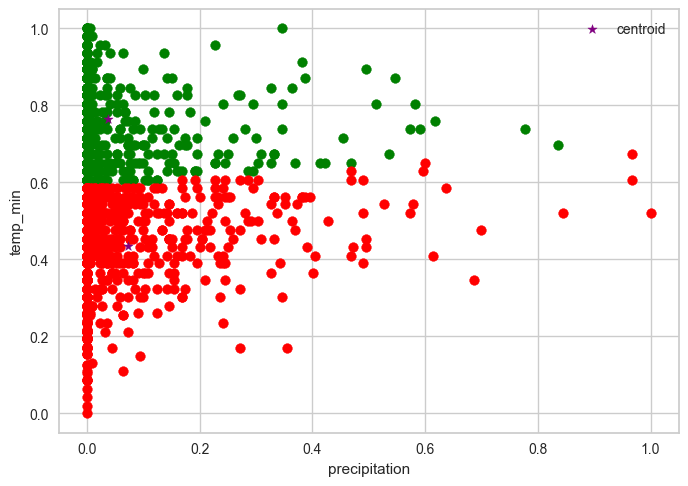

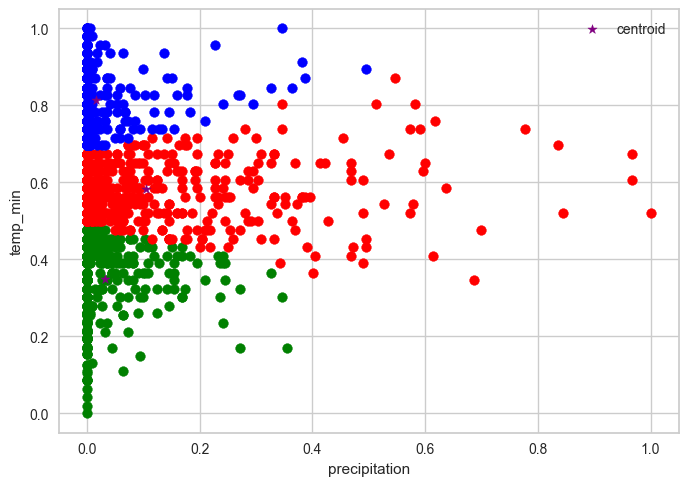

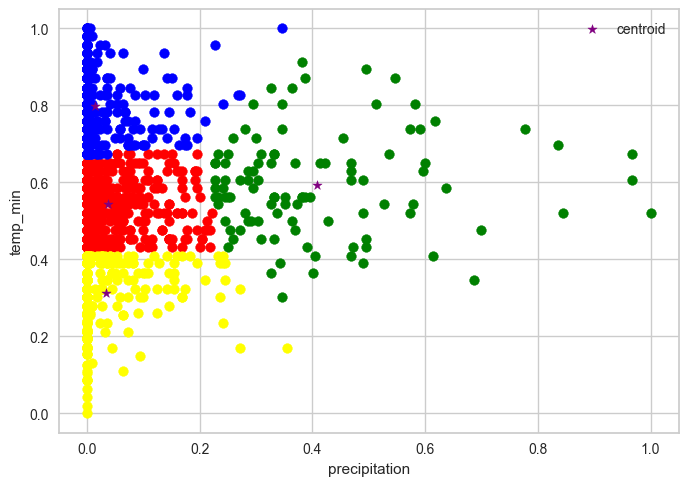

In [12]:
# precipitation ~ temp_min (cluster = 2)
km_premin2.cluster_centers_
cluster1 = df_premin2[df_premin2.cluster==0]
cluster2 = df_premin2[df_premin2.cluster==1]
plt.scatter(cluster1['precipitation'],cluster1['temp_min'],color='green')
plt.scatter(cluster2['precipitation'],cluster2['temp_min'],color='red')
plt.scatter(km_premin2.cluster_centers_[:,0], km_premin2.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('precipitation')
plt.ylabel('temp_min')
plt.legend()
plt.show()

# precipitation ~ temp_min (cluster = 3)
km_premin3.cluster_centers_
cluster1 = df_premin3[df_premin3.cluster==0]
cluster2 = df_premin3[df_premin3.cluster==1] 
cluster3 = df_premin3[df_premin3.cluster==2] 
plt.scatter(cluster1['precipitation'],cluster1['temp_min'],color='green')
plt.scatter(cluster2['precipitation'],cluster2['temp_min'],color='red')
plt.scatter(cluster3['precipitation'],cluster3['temp_min'],color='blue')
plt.scatter(km_premin3.cluster_centers_[:,0], km_premin3.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('precipitation')
plt.ylabel('temp_min')
plt.legend()
plt.show()

# precipitation ~ temp_min (cluster = 4)
km_premin4.cluster_centers_
cluster1 = df_premin4[df_premin4.cluster==0]
cluster2 = df_premin4[df_premin4.cluster==1]
cluster3 = df_premin4[df_premin4.cluster==2]
cluster4 = df_premin4[df_premin4.cluster==3]
plt.scatter(cluster1['precipitation'],cluster1['temp_min'],color='green')
plt.scatter(cluster2['precipitation'],cluster2['temp_min'],color='red')
plt.scatter(cluster3['precipitation'],cluster3['temp_min'],color='blue')
plt.scatter(cluster4['precipitation'],cluster4['temp_min'],color='yellow')
plt.scatter(km_premin4.cluster_centers_[:,0], km_premin4.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('precipitation')
plt.ylabel('temp_min')
plt.legend()
plt.show()

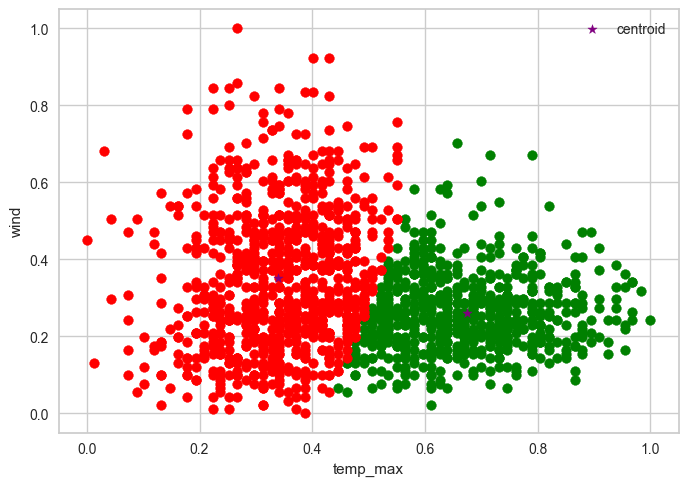

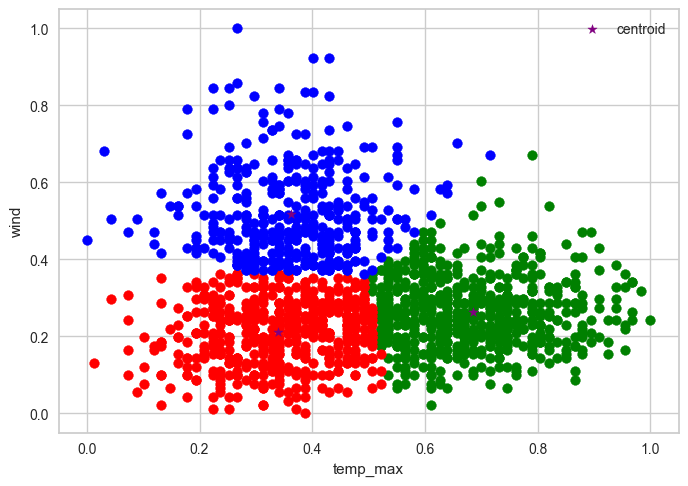

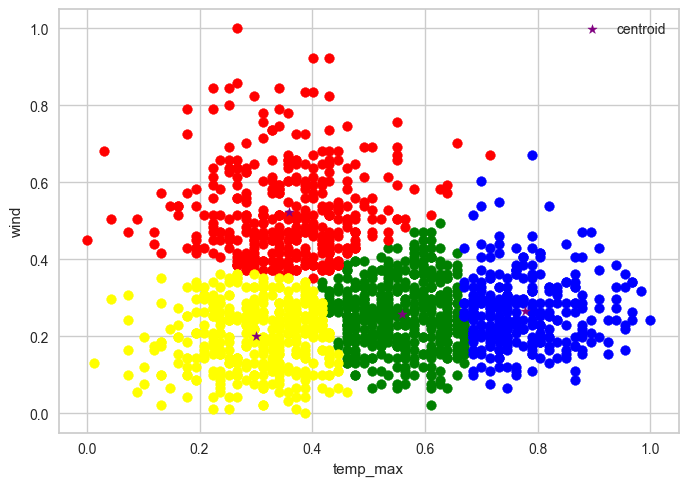

In [13]:
# temp_max ~ wind (cluster = 2)
km_maxwind2
cluster1 = df_maxwind2[df_maxwind2.cluster==0]
cluster2 = df_maxwind2[df_maxwind2.cluster==1]
plt.scatter(cluster1['temp_max'],cluster1['wind'],color='green')
plt.scatter(cluster2['temp_max'],cluster2['wind'],color='red')
plt.scatter(km_maxwind2.cluster_centers_[:,0], km_maxwind2.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('temp_max')
plt.ylabel('wind')
plt.legend()
plt.show()

# temp_max ~ wind (cluster = 3)
km_maxwind3.cluster_centers_
cluster1 = df_maxwind3[df_maxwind3.cluster==0]
cluster2 = df_maxwind3[df_maxwind3.cluster==1] 
cluster3 = df_maxwind3[df_maxwind3.cluster==2] 
plt.scatter(cluster1['temp_max'],cluster1['wind'],color='green')
plt.scatter(cluster2['temp_max'],cluster2['wind'],color='red')
plt.scatter(cluster3['temp_max'],cluster3['wind'],color='blue')
plt.scatter(km_maxwind3.cluster_centers_[:,0], km_maxwind3.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('temp_max')
plt.ylabel('wind')
plt.legend()
plt.show()

# temp_max ~ wind (cluster = 4)
km_maxwind4.cluster_centers_
cluster1 = df_maxwind4[df_maxwind4.cluster==0]
cluster2 = df_maxwind4[df_maxwind4.cluster==1]
cluster3 = df_maxwind4[df_maxwind4.cluster==2]
cluster4 = df_maxwind4[df_maxwind4.cluster==3]
plt.scatter(cluster1['temp_max'],cluster1['wind'],color='green')
plt.scatter(cluster2['temp_max'],cluster2['wind'],color='red')
plt.scatter(cluster3['temp_max'],cluster3['wind'],color='blue')
plt.scatter(cluster4['temp_max'],cluster4['wind'],color='yellow')
plt.scatter(km_maxwind4.cluster_centers_[:,0], km_maxwind4.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('temp_max')
plt.ylabel('wind')
plt.legend()
plt.show()